In [45]:
# import necesarry modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [46]:
# import the dataset
auto_mpg = pd.read_csv('./auto_mpg.csv')
auto_mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [47]:
# information of the dataset
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


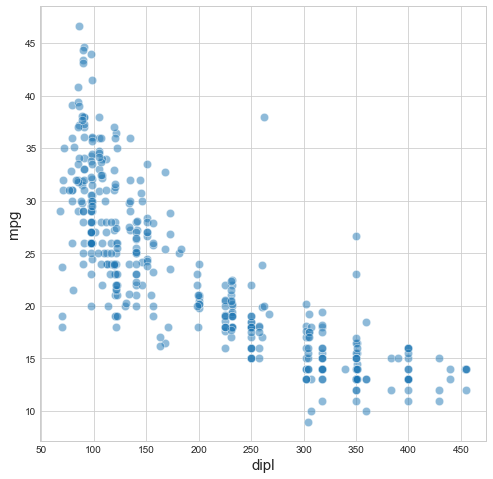

In [48]:
# plot breast cancer dataset in 2D
plt.figure(figsize = [8, 8])
sns.scatterplot(x = 'displ',
                y = 'mpg',
                data = auto_mpg,
                markers = '.',
                alpha = 0.5,
                s = 70)
plt.xlabel('dipl', size = 15)
plt.ylabel('mpg', size = 15)

plt.show()

In [49]:
# Create feature and target arrays
X = auto_mpg[['displ']]
y = auto_mpg[['mpg']]
data = [X, y]
data[0].head()

,displ
0,250.0
1,304.0
2,91.0
3,250.0
4,97.0


In [56]:
# regression-tree in scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# splot dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

# instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth = 4,
                           min_samples_leaf = 0.26,
                           random_state = 3)

In [57]:
# fit dt to the training-set
dt.fit(X_train, y_train)

# predict test-set labels
y_pred = dt.predict(X_test)

# compute test-set MSE
mse_dt = MSE(y_test, y_pred)

# compute test-set RMSE
rmse_dt = mse_dt ** (1/2)

# print rmse_dt
print("Test set RMSE of dt: {:.3f}".format(rmse_dt))

Test set RMSE of dt: 5.006


In [61]:
# K-Fold CV in sklearn on the auto_mpg dataset
from sklearn.model_selection import cross_val_score

# evaluate the list of MSE ontained by 10-fold CV
# set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV_scores = - cross_val_score(dt,
                           X_train,
                           y_train,
                           cv = 5,
                           scoring = 'neg_mean_squared_error',
                           n_jobs = -1)

# fit dt to the training set
dt.fit(X_train, y_train)

# predict the labels of training set
y_predict_train = dt.predict(X_train)

# predict the labels of the test set
y_predict_test = dt.predict(X_test)

In [63]:
# Compute the 5-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean()) ** (1/2)

# Print RMSE_CV
print('CV RMSE: {:.3f}'.format(RMSE_CV))


# Compute the 5-folds Train RMSE
RMSE_train = (MSE(y_train, y_predict_train)) ** (1/2)

# Print RMSE_train
print('Train RMSE: {:.3f}'.format(RMSE_train))

# Compute the 5-folds Test RMSE
RMSE_test = (MSE(y_test, y_predict_test)) ** (1/2)

# Print RMSE_test
print('Test RMSE: {:.3f}'.format(RMSE_test))

CV RMSE: 4.424
Train RMSE: 4.297
Test RMSE: 5.006
